### Zadania
 
1. Uruchomić 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mnożenie BLAS w Julii (`A*B`) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów. Wszystkie trzy metody powinny być na jednym wykresie. **(1pkt)**. Do analizy danych można użyć wybranego narzędzia (Julia, R)

In [1]:
using LinearAlgebra
using DataFrames
using CSV
using Statistics
using Plots
using Polynomials
using Pkg
using TaylorSeries


(process:35896): GLib-GIO-WARNING **: 12:53:44.686: Unexpectedly, UWP app `Microsoft.ZuneVideo_10.22021.10291.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ZuneVideo_8wekyb3d8bbwe!Microsoft.ZuneVideo') supports 33 extensions but has no verbs


In [2]:
# przykład do małych kompilacji
Asmall = [[1.0 4.0]; [0.0 1.0]]
Bsmall = Asmall

2×2 Matrix{Float64}:
 1.0  4.0
 0.0  1.0

In [3]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [4]:
#kompilacja
naive_multiplication(Asmall, Bsmall)

2×2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

In [5]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
# można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [6]:
better_multiplication(Asmall, Bsmall)

2×2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

In [7]:
#kompilacja funkcji BLASowej do mnożenia macierzy
Asmall*Bsmall

2×2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

In [8]:
sizes = Int64[]
times = Float64[]
method = String[]

for i=10:25:1000
    A = rand(i, i);
    B = rand(i, i);
    for k=1:10
        for j=1:3
            if j == 1
                time = @elapsed naive_multiplication(A, B)
                push!(method, "naive")
            elseif j == 2
                time = @elapsed better_multiplication(A, B)
                push!(method, "better")
            else
                time = @elapsed A*B
                push!(method, "blas")
            end
            push!(times, time)
            push!(sizes, i)
        end
    end
end

In [9]:
df = DataFrame(size = sizes,
    method = method, 
    time = times)

grouped = groupby(df, [:size, :method])
stats = combine(grouped, "time" => mean, "time" => std)

,size,method,time_mean,time_std
,Int64,String,Float64,Float64
1,10,naive,1.94e-6,2.17051e-7
2,10,better,1.76e-6,3.33999e-7
3,10,blas,0.0002305,0.000726727
4,35,naive,0.00010237,3.11022e-6
5,35,better,6.882e-5,3.98017e-6
6,35,blas,7.04e-6,3.16375e-6
7,60,naive,0.0005548,1.18583e-5
8,60,better,0.00029745,4.76148e-6
9,60,blas,3.008e-5,3.71866e-6


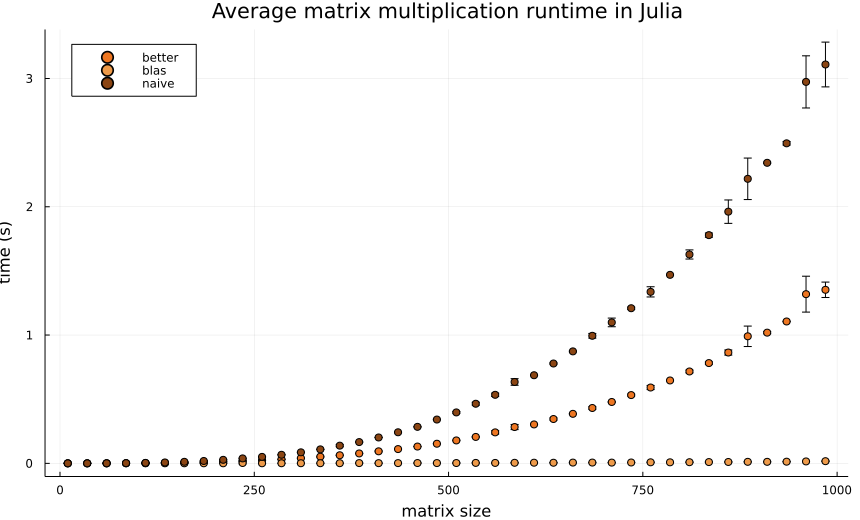

In [10]:
scatter(stats.size, stats.time_mean, group=stats.method, 
    title = "Average matrix multiplication runtime in Julia",
    label = ["better" "blas" "naive"], 
    colour = [:chocolate2 :tan2 :saddlebrown],  
    yerr=stats.time_std, 
    xlabel="matrix size", ylabel="time (s)", size=(860, 520), legend=:topleft)

2. Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1). **(1 pkt)**
    
    *(Dla chętnych)* sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. 
Do analizy danych można użyć wybranego narzędzia (Julia, R)

```c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <gsl/gsl_blas.h>

int ** declare_matrix(int size){
	int ** A = (int **) calloc (sizeof(int *), size);
    for(int i = 0; i < size; i++){
        A[i] = (int *)calloc(sizeof(int), size);
    }
    for(int i = 0; i < size; i++){
        for (int j = 0; j < size; j++){
            A[i][j] = rand()%10;
        }
    }
	return A;
}

double naive(int *A[], int *B[], int size){
    clock_t start, end;
	double time;
	int ** C = (int **) calloc(sizeof(int *), size);
	for(int i = 0; i < size; i++){
		C[i] = (int *)calloc(sizeof(int), size);
	}
    start = clock();
	for(int i = 0; i < size; i++){
		for(int j = 0; j < size; j++){
			for(int k = 0; k < size; k++){
				C[i][j] = C[i][j] + A[i][k]*B[k][j];
			}
		}
	}
    end = clock();
	for(int i = 0; i < size; i++){
		free(C[i]);
	}
    time = ((double) (end - start)) / CLOCKS_PER_SEC;
	return time;
}

double better(int *A[], int *B[], int size){
    clock_t start, end;
	double time;
	int ** C = (int **) calloc(sizeof(int *), size);
	for(int i = 0; i < size; i++){
		C[i] = (int *)calloc(sizeof(int), size);
	}
    start = clock();
	for(int i = 0; i < size; i++){
		for(int k = 0; k < size; k++){
			for(int j = 0; j < size; j++){
				C[i][j] = C[i][j] + A[i][k]*B[k][j];
			}
		}
	}
    end = clock();
	for(int i = 0; i < size; i++){
		free(C[i]);
	}
    time = ((double) (end - start)) / CLOCKS_PER_SEC;
	return time;
}

double gsl_blas(int *A[], int *B[], int size){
    clock_t start, end;
	double time;
    double * a = (double *)calloc(sizeof(double ), size*size);
    double * b = (double *)calloc(sizeof(double ), size*size);
    double * c = (double *)calloc(sizeof(double ), size*size);
    int k = 0;
    for(int i = 0; i < size; i++){
        for (int j = 0; j < size; ++j) {
            a[k] = (double ) A[i][j];
            b[k] = (double ) B[i][j];
            k++;
        }
    }
    gsl_matrix_view A2 = gsl_matrix_view_array(a, size, size);
    gsl_matrix_view B2 = gsl_matrix_view_array(b, size, size);
    gsl_matrix_view C = gsl_matrix_view_array(c, size, size);
    start = clock();
    gsl_blas_dgemm(CblasNoTrans, CblasNoTrans, 1.0, &A2.matrix, &B2.matrix, 0.0, &C.matrix);
    end = clock();
    free(a);
    free(b);
    free(c);
    time = ((double) (end - start)) / CLOCKS_PER_SEC;
	return time;
}

int main(){
    int n = 10;
	int sizes[n];
    int size[n*10*3];
	char * method[n*10*3];
    float times[n*10*3];

	sizes[0] = 10;
    int j = 10;
	for(int i = 1; i < n; i++){
		sizes[i] = j;
        j += 25;
	}

    printf("size,time,method\n");
    int s = 0;
	for(int i = 0; i < n; i++){
		int ** A = declare_matrix(sizes[i]);
		int ** B = declare_matrix(sizes[i]);
		for(int j = 0; j < 10; j++){
			for(int k = 0; k < 3; k++){
                double time;
                if(k == 0){
                    time = naive(A, B, sizes[i]);
                    method[s] = "naive";
                }else if(k == 1){
                    time = better(A, B, sizes[i]);
                    method[s] = "better";
                }else{
                    time = gsl_blas(A, B, sizes[i]);
                    method[s] = "gsl blas";
                }
                times[s] = time;
                size[s] = sizes[i];
                s++;
			}
		}

		for(int k = 0; k < sizes[i]; k++){
			free(A[k]);
			free(B[k]);
		}

    }

    for(int i = 0; i < n*10*3; i++){
        printf("%d,%f,%s\n", size[i], times[i], method[i]);
    }

    return 0;
}

```



In [11]:
# odczytanie z pliku CSV, pogrupowanie i wyliczenie średniego czasu i odchyleń
df_ = CSV.read("try.csv", delim=",",DataFrame)
grouped_ = groupby(df_, [:size, :method])
stats_ = combine(grouped_, "time" => mean, "time" => std)

,size,method,time_mean,time_std
,Int64,String15,Float64,Float64
1,10,naive,4.1e-6,3.07794e-7
2,10,better,4.05e-6,2.23607e-7
3,10,gsl blas,2.8e-6,8.28823e-6
4,35,naive,0.0001516,3.13404e-6
5,35,better,0.0001561,1.03113e-5
6,35,gsl blas,2.66e-5,8.43274e-7
7,60,naive,0.000674,2.79245e-5
8,60,better,0.0006944,2.82772e-5
9,60,gsl blas,9.45e-5,4.52769e-6


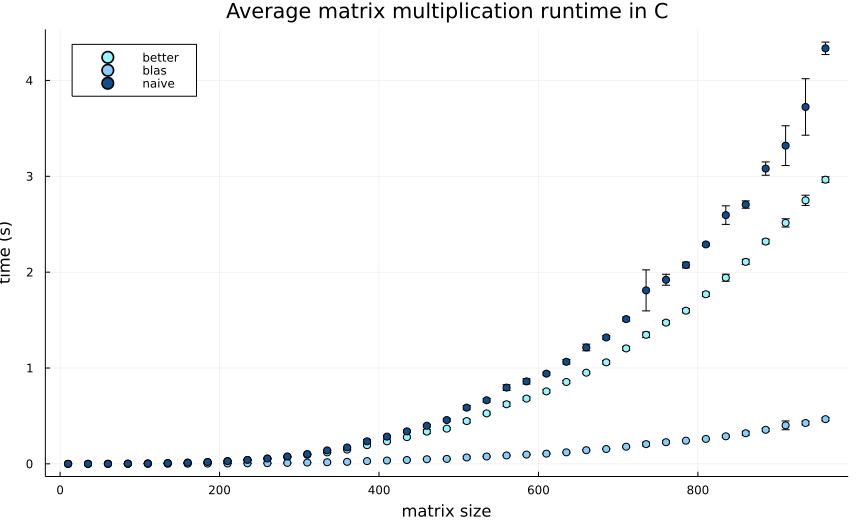

In [12]:
scatter(stats_.size, stats_.time_mean, group=stats_.method, 
    title = "Average matrix multiplication runtime in C",
    label = ["better" "blas" "naive"], 
    colour = [:cadetblue1 :skyblue1 :dodgerblue4],  
    yerr=stats_.time_std, 
    xlabel="matrix size", ylabel="time (s)", size=(860, 520), legend=:topleft)

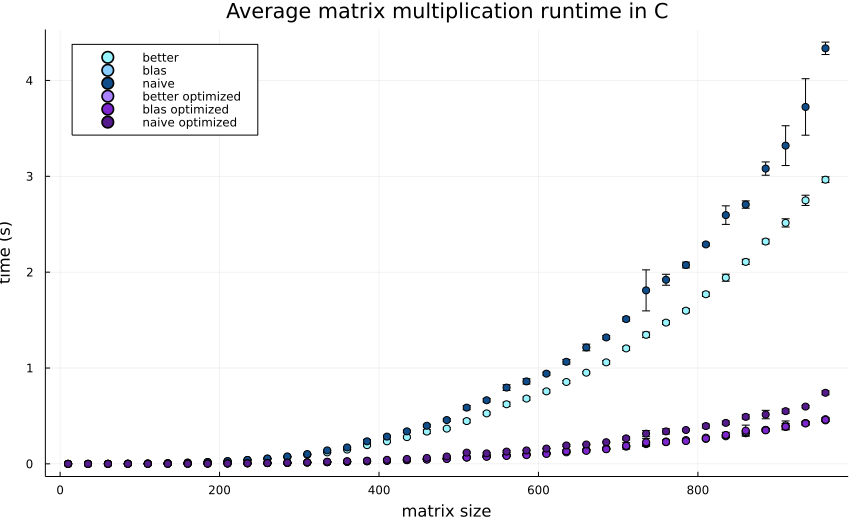

In [13]:
# dla opcji z optymalizacją O1
df_o = CSV.read("try_o1.csv", delim=",",DataFrame)
grouped_o = groupby(df_o, [:size, :method])
stats_o = combine(grouped_o, "time" => mean, "time" => std)
scatter!(stats_o.size, stats_o.time_mean, group=stats_o.method, 
    label = ["better optimized" "blas optimized" "naive optimized"], 
    colour = [:mediumpurple1 :purple3 :purple4],  
    yerr=stats_o.time_std)

3.  Użyć aproksymacji odpowiednimi wielomianami, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów. **(1 pkt)** Do analizy danych można użyć wybranego narzędzia (Julia, R)

In [14]:
jnaive = stats[stats.method .=="naive" , :]
jbetter = stats[stats.method .=="better" , :]
jblas = stats[stats.method .=="blas" , :]
cnaive = stats_[stats_.method .=="naive" , :]
cbetter = stats_[stats_.method .=="better" , :]
cblas = stats_[stats_.method .=="gsl blas" , :]

,size,method,time_mean,time_std
,Int64,String15,Float64,Float64
1,10,gsl blas,2.8e-6,8.28823e-6
2,35,gsl blas,2.66e-5,8.43274e-7
3,60,gsl blas,9.45e-5,4.52769e-6
4,85,gsl blas,0.0002783,8.83239e-6
5,110,gsl blas,0.0005541,1.94962e-5
6,135,gsl blas,0.0010253,3.89303e-5
7,160,gsl blas,0.0017285,4.59208e-5
8,185,gsl blas,0.002686,9.79478e-5
9,210,gsl blas,0.004086,0.00010387


In [15]:
fit_jnaive = fit(jnaive.size, jnaive.time_mean, 3) 

Polynomial(-0.022604396156965578 + 0.000367458903517444*x - 1.2520109631161063e-6*x^2 + 4.135877046310498e-9*x^3)

In [16]:
fit_jbetter = fit(jbetter.size, jbetter.time_mean, 3) 

Polynomial(-0.011430686910258076 + 0.00018622961422521056*x - 5.90502780265722e-7*x^2 + 1.8352422897047365e-9*x^3)

In [17]:
fit_jblas = fit(jblas.size, jblas.time_mean, 3) 

Polynomial(-4.038693814552129e-5 + 3.984582880669075e-6*x - 6.8670559543823566e-9*x^2 + 1.9540402228384965e-11*x^3)

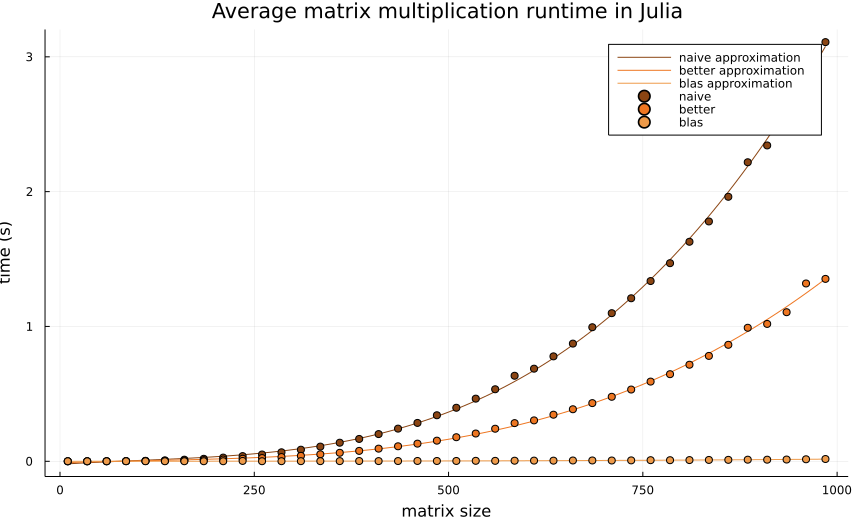

In [18]:
plot(fit_jnaive,  extrema(jnaive.size)..., label ="naive approximation", color=:saddlebrown, size=(860, 520), 
    title="Average matrix multiplication runtime in Julia",
xlabel="matrix size", ylabel="time (s)")
plot!(fit_jbetter,  extrema(jbetter.size)..., label ="better approximation", color=:chocolate2)
plot!(fit_jblas,  extrema(jblas.size)..., label ="blas approximation", color=:tan2)

scatter!(jnaive.size, jnaive.time_mean, label ="naive", color=:saddlebrown)
scatter!(jbetter.size, jbetter.time_mean, label ="better", color=:chocolate2)
scatter!(jblas.size, jblas.time_mean, label ="blas", color=:tan2)

In [19]:
fit_cnaive = fit(cnaive.size, cnaive.time_mean, 3) 

Polynomial(-0.04296968415062044 + 0.0006688374206132777*x - 2.3776657121558687e-6*x^2 + 6.415321209547625e-9*x^3)

In [20]:
fit_cbetter = fit(cbetter.size, cbetter.time_mean, 3) 

Polynomial(-0.0020571620438613295 + 5.057382412143559e-6*x + 9.308404576025672e-9*x^2 + 3.3292523294895424e-9*x^3)

In [21]:
fit_cblas = fit(cblas.size, cblas.time_mean, 3) 

Polynomial(-0.0028861966267947634 + 4.9236854127753775e-5*x - 1.8420451060954693e-7*x^2 + 6.649843583882063e-10*x^3)

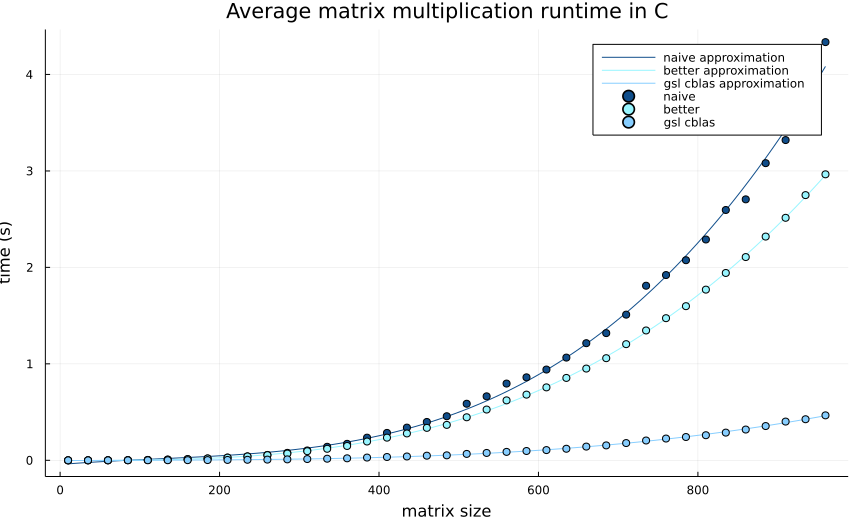

In [22]:
plot(fit_cnaive,  extrema(cnaive.size)..., label ="naive approximation", color=:dodgerblue4, size=(860, 520), 
    title="Average matrix multiplication runtime in C",
xlabel="matrix size", ylabel="time (s)")
plot!(fit_cbetter,  extrema(cbetter.size)..., label ="better approximation", color=:cadetblue1)
plot!(fit_cblas,  extrema(cblas.size)..., label ="gsl cblas approximation", color=:skyblue1)

scatter!(cnaive.size, cnaive.time_mean, label ="naive", color=:dodgerblue4)
scatter!(cbetter.size, cbetter.time_mean, label ="better", color=:cadetblue1)
scatter!(cblas.size, cblas.time_mean, label ="gsl cblas", color=:skyblue1)

4. Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. **(1 pkt)**

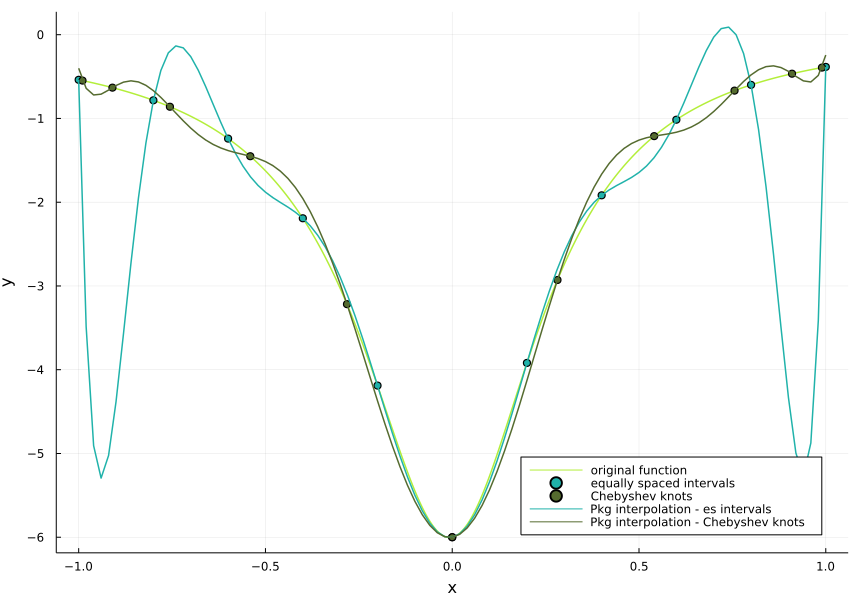

In [23]:
# przykładowa funkcja
function fun(x)
    return ((x-6)/(12*x^2+1))
end

# wyliczenie wartości do dokładnego wykresu funkcji
xss = -1:0.001:1
yss = [fun(x) for x in xss]

# węzły równoodległe i wartości dla nich (11 węzłów)
xs = -1:0.2:1
ys = [fun(x) for x in xs]

# węzły Czebyszewa i wartości dla nich (11 węzłów -> push ponieważ węzły Czebyszewa od T_0)
coeffs = [0 for x in xs]
push!(coeffs, 1)

# wyliczenie wielomanu Czebyszewa
ch = ChebyshevT(coeffs)
ch_xs = roots(ch)
ch_ys = [fun(x) for x in ch_xs]

plot(xss, yss, size=(860, 600), label="original function", legend=:bottomright, color=:olivedrab2, width=1.5,
xlabel="x", ylabel="y")
scatter!(xs, ys, label="equally spaced intervals", color=:lightseagreen)
scatter!(ch_xs, ch_ys, label="Chebyshev knots", color=:darkolivegreen)

f1 = fit(xs, ys)
f2 = fit(ch_xs, ch_ys)
plot!(f1, extrema(xs)..., label="Pkg interpolation - es intervals", color=:lightseagreen, width=1.5)
plot!(f2, extrema(xs)..., label="Pkg interpolation - Chebyshev knots", color=:darkolivegreen, width=1.5)

5. Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ **(1 pkt)**

In [24]:
# funkcja do przybliżenia
function func(x)
    return sqrt((8+7*x)/(6+x))
end

func (generic function with 1 method)

In [25]:
# definiujemy, ile pierwszych wyrazów szeregu Taylora nas interesuje
t = Taylor1(Float64, 5)
# rozwinięcie Taylora
taylor = func(t)

 1.1547005383792515 + 0.40895644067598497 t - 0.14057877648236983 t² + 0.061148217800727794 t³ - 0.032107344253873016 t⁴ + 0.01913138093601449 t⁵ + 𝒪(t⁶)

In [26]:
# tworzymy wielomian dla pakietu Polynomials
fieldnames(typeof(taylor))
taylor.coeffs
pol_taylor = Polynomial(taylor.coeffs)

Polynomial(1.1547005383792515 + 0.40895644067598497*x - 0.14057877648236983*x^2 + 0.061148217800727794*x^3 - 0.032107344253873016*x^4 + 0.01913138093601449*x^5)

In [27]:
# aproksymujemy techniką Pade n = m+1, n = 3, m = 2
pade = Polynomials.PolyCompat.PadeApproximation.Pade(pol_taylor, 3, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64, Float64}(Polynomial(1.1547005383792515 + 1.4915765725601562*x + 0.45003497021586225*x^2 + 0.002723153650433447*x^3), Polynomial(1.0 + 0.9375765368601515*x + 0.1794281516603395*x^2), :x)

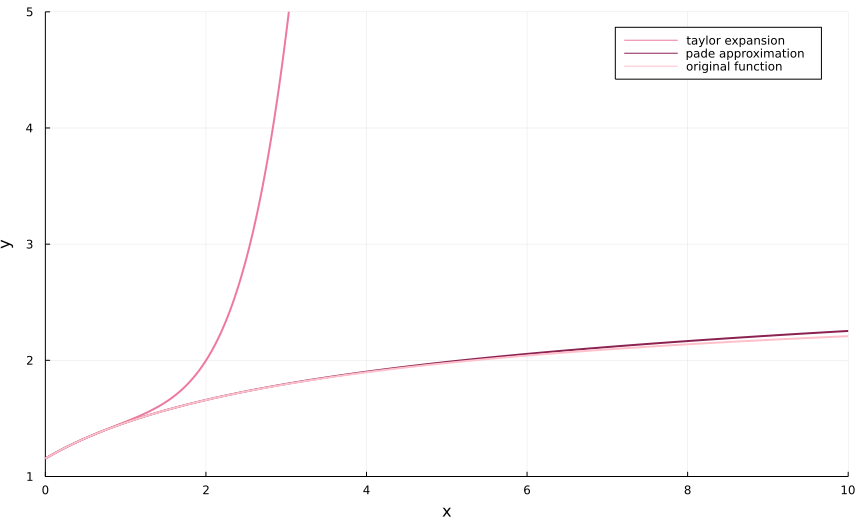

In [28]:
# wybór punktów do wykresu
xs = 0:0.01:10
ys = [func(x) for x in xs]
ts = [pol_taylor(x) for x in xs]
ps = [pade(x) for x in xs]

# wykres
plot(xs, ts, label="taylor expansion", color=:palevioletred2, linewidth=2, size=(860, 520), xlabel="x", ylabel="y", 
    ylims=(1,5), xlims=(0,10))
plot!(xs, ps, label="pade approximation", color=:violetred4, linewidth=2)
plot!(xs, ys, label="original function", color=:pink, linewidth=2)